In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)

In [2]:
# Data Load
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
data, target = iris["data"], iris["target"]

In [6]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# Data DEA
pd.DataFrame(data, columns=iris["feature_names"]).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
pd.Series(target).value_counts()

0    50
1    50
2    50
dtype: int64

In [10]:
# Data split
# stratify 옵션에 label을 주면 원본 데이터의 정답 분포를 반영해 데이터를 나눔
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2022, stratify=target
)

In [11]:
print("train data 개수:", len(train_data))
print("train data 개수:", len(test_data))

train data 개수: 105
train data 개수: 45


In [12]:
pd.Series(train_target).value_counts()

0    35
1    35
2    35
dtype: int64

In [13]:
pd.Series(test_target).value_counts()

0    15
1    15
2    15
dtype: int64

In [14]:
# Multiclass
from sklearn.linear_model import LogisticRegression

In [15]:
X = train_data[:, :2]

(1.5, 4.9)

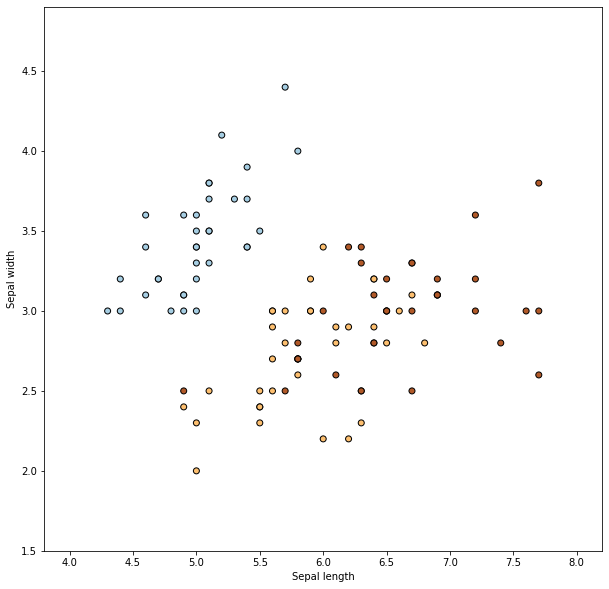

In [17]:
# 시각화
plt.figure(1, figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=train_target, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)

In [18]:
# One vs Rest 방법의 Logistic Regression
ovr_logit = LogisticRegression(multi_class='ovr')
ovr_logit.fit(X, train_target)

LogisticRegression(multi_class='ovr')

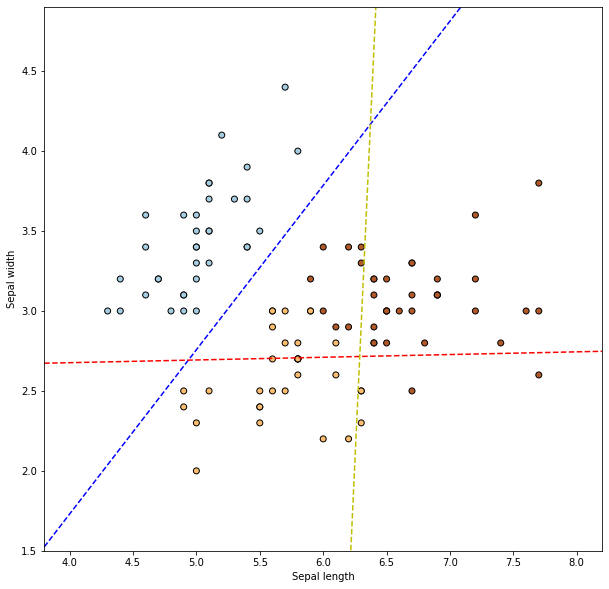

In [22]:
# 시각화
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(1, figsize=(10, 10))

plt.scatter(X[:, 0], X[:, 1], c=ovr_logit.predict(X), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

coef = ovr_logit.coef_
intercept = ovr_logit.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([x_min, x_max], [line(x_min), line(x_max)],
            ls="--", color=color)

for i, color in zip(ovr_logit.classes_, "bry"):
    plot_hyperplane(i, color)

In [23]:
# Multinomial
multi_logit = LogisticRegression(multi_class="multinomial")
multi_logit.fit(X, train_target)

LogisticRegression(multi_class='multinomial')

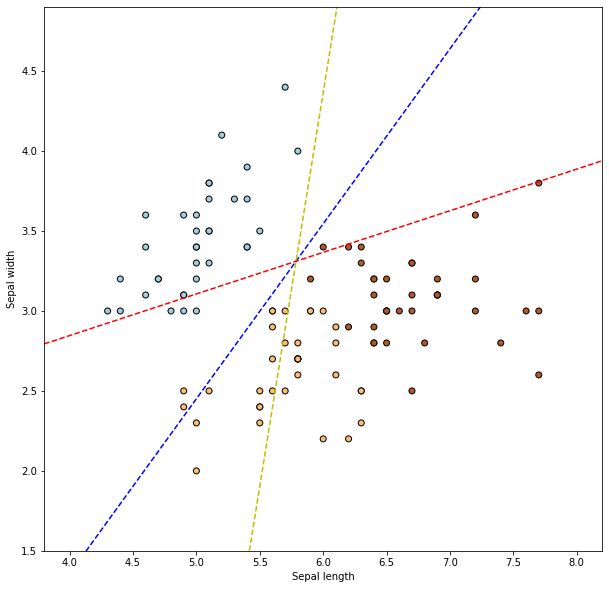

In [26]:
# 시각화
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(1, figsize=(10, 10))

plt.scatter(X[:, 0], X[:, 1], c=multi_logit.predict(X), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

coef = multi_logit.coef_
intercept = multi_logit.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([x_min, x_max], [line(x_min), line(x_max)],
            ls="--", color=color)

for i, color in zip(multi_logit.classes_, "bry"):
    plot_hyperplane(i, color)

In [27]:
# Logistic Regression(Multinomial) - 전체 데이터로 학습
multi_logit = LogisticRegression()

In [28]:
# 학습
multi_logit.fit(train_data, train_target)

C:\Users\sclab\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
# 예측
train_pred_proba = multi_logit.predict_proba(train_data)

In [30]:
sample_pred = train_pred_proba[0]
sample_pred

array([0.01001059, 0.91861176, 0.07137765])

In [31]:
print(f"class 0에 속하지 않을 확률: {1 - sample_pred[0]:.4f}")
print(f"class 1과 2에 속할 확률: {sample_pred[1:].sum():.4f}")

class 0에 속하지 않을 확률: 0.9900
class 1과 2에 속할 확률: 0.9900


In [32]:
train_pred = multi_logit.predict(train_data)
test_pred = multi_logit.predict(test_data)

In [34]:
# 평가
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)

In [35]:
print(f"Train accuracy is : {train_acc:.2f}")
print(f"Test accuracy is : {test_acc:.2f}")

Train accuracy is : 0.98
Test accuracy is : 0.93


In [36]:
# Logistic Regression(OVR)
ovr_logit = LogisticRegression(multi_class="ovr")

In [38]:
# 학습
ovr_logit.fit(train_data, train_target)

LogisticRegression(multi_class='ovr')

In [39]:
# 예측
ovr_train_pred = ovr_logit.predict(train_data)
ovr_test_pred = ovr_logit.predict(test_data)

In [40]:
# 평가
ovr_train_acc = accuracy_score(train_target, ovr_train_pred)
ovr_test_acc = accuracy_score(test_target, ovr_test_pred)

In [41]:
print(f"One vs Rest Train accuracy is : {ovr_train_acc:.2f}")
print(f"One vs Rest Test accuracy is : {ovr_test_acc:.2f}")

One vs Rest Train accuracy is : 0.96
One vs Rest Test accuracy is : 0.91
